In [661]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 150

## D3

In [690]:
N = 500
M = 500
h = 1 / max(N, M)
Grid = np.zeros((N, M))
ux1 = np.zeros(M) 
ux2 = np.zeros(M) 
uy1 = np.zeros(M) 
uy2 = np.zeros(N) 

In [691]:
a = -50
b = -38
c = 100

def f(x, y):
    A = np.abs(x + y - 1) < 0.03
    B = np.abs(-3*x - 0.7*y) < 1
    C = (x - 0.8) ** 2 + (0.9*y - 0.8) ** 2 < 0.04**2
    D = (c*x + a) ** 2 + ((c*y + b) - (np.sqrt(np.abs(c*x + a))**2)) < 1
    return  50 * np.array(A + B + C +D)

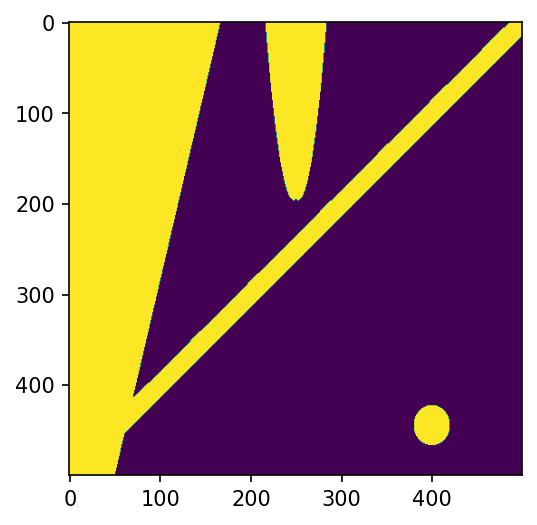

In [692]:
X, Y = np.meshgrid(np.linspace(0, 1, M, endpoint=False), np.linspace(0, 1, N, endpoint=False))
plt.imshow((f(X, Y)))

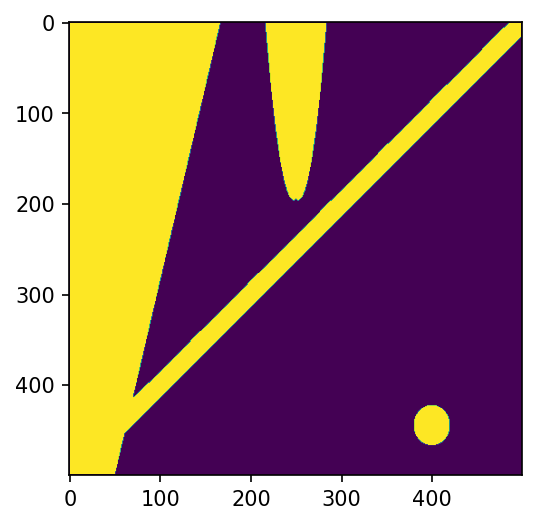

In [728]:
N = 500
M = 500
h = 1 / max(N, M)
Grid = np.zeros((N, M))
ux1 = np.zeros(M) 
ux2 = np.zeros(M) 
uy1 = np.zeros(M) 
uy2 = np.zeros(N) 

Grid[0] = ux1
Grid[N-1] = ux2
Grid[:, 0] = uy1
Grid[:, M-1] = uy2

eps = 5e-4
r = 100
while r > eps:
    r = np.max(np.abs(Grid[1:N-1, 1:M-1] - (Grid[2:N, 1:M-1] + Grid[0:N-2, 1:M-1] + Grid[1:N-1, 2:M] + Grid[1:N-1, 0:M-2])/4 - f(X[1:N-1, 1:M-1], Y[1:N-1, 1:M-1])*h**2 / 4 ))
    Grid[1:N-1, 1:M-1] = (Grid[2:N, 1:M-1] + Grid[0:N-2, 1:M-1] + Grid[1:N-1, 2:M] + Grid[1:N-1, 0:M-2])/4 + f(X[1:N-1, 1:M-1], Y[1:N-1, 1:M-1])*h**2 / 4
    
    
plt.imshow(Grid)

## D4

In [566]:
N = 500
M = 500
T_steps = 5000
T = 0.005
h = 1 / max(N, M)
dt = T / T_steps
u = np.zeros((T_steps, N, M))
ux1 = np.zeros(M) + 0
ux2 = np.zeros(M) + 0
uy1 = np.zeros(N) + 0
uy2 = np.zeros(N) + 0
u[0, 0] = ux1
u[0, N-1] = ux2
u[0, :, 0] = uy1
u[0, :, M-1] = uy2

In [557]:
a = -50
b = -38
c = 100

def f(x, y):
    A = np.abs(x + y - 1) < 0.03
    B = np.abs(-3*x - 0.7*y) < 1
    C = (x - 0.8) ** 2 + (0.9*y - 0.8) ** 2 < 0.04**2
    D = (c*x + a) ** 2 + ((c*y + b) - (np.sqrt(np.abs(c*x + a))**2)) < 1
    return  50 * np.array(A + B + C +D)

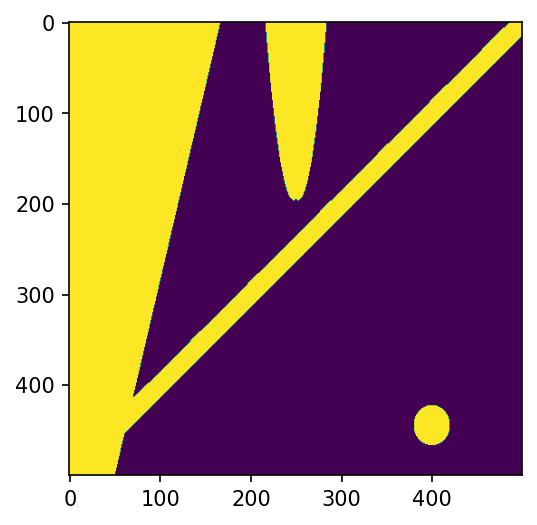

In [558]:
X, Y = np.meshgrid(np.linspace(0, 1, M, endpoint=False), np.linspace(0, 1, N, endpoint=False))
plt.imshow((f(X, Y)))

In [559]:
for i in range(1, T_steps):
    u[i, 1:N-1, 1:M-1] = u[i-1, 1:N-1, 1:M-1] + dt * (f(X[1:N-1, 1:M-1], Y[1:N-1, 1:M-1]) + (u[i-1, 2:N, 1:M-1] + u[i-1, 0:N-2, 1:M-1] 
                                                                                             + u[i-1, 1:N-1, 2:M] + u[i-1, 1:N-1, 0:M-2] - 4 * u[i-1, 1:N-1, 1:M-1]) / h**2)

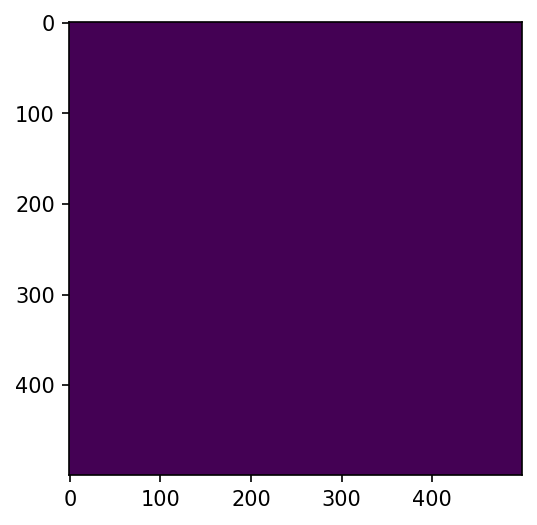

In [560]:
plt.imshow(u[0])

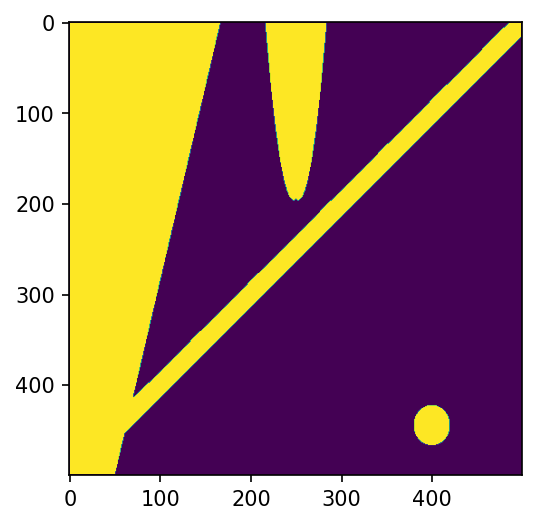

In [561]:
plt.imshow(u[1])

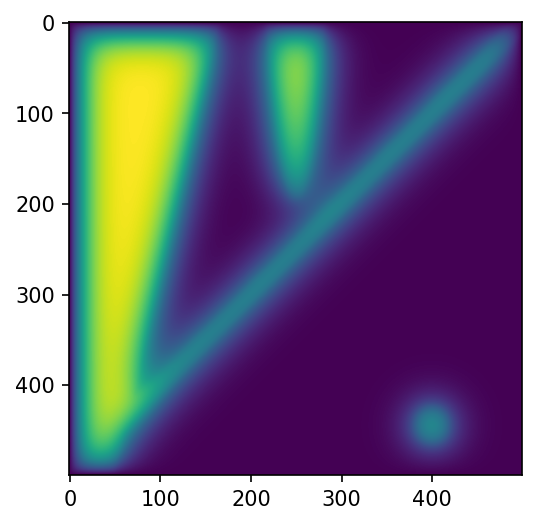

In [562]:
plt.imshow(u[2000])

In [546]:
n_list = [1, 10, 50, 100, 500, 1000, 2000, 3000, 4000]
i_list = [1, 2, 3]

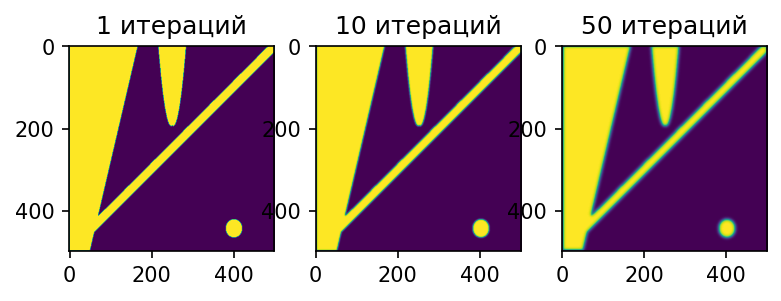

In [563]:
fig = plt.figure()
for i in i_list:
    ax = fig.add_subplot(1,3,i)
    plt.imshow(u[n_list[i-1]] )
    plt.title(f'{n_list[i-1]} итераций')
plt.show()

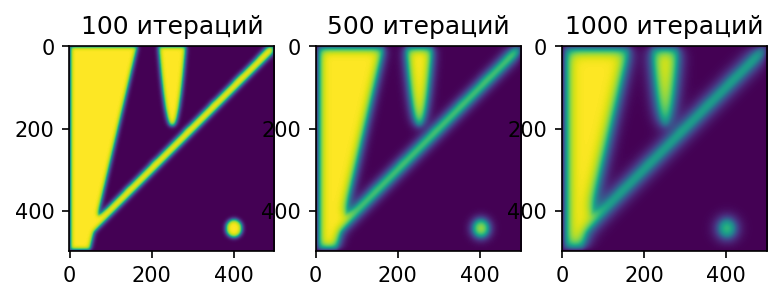

In [564]:
fig = plt.figure()
for i in i_list:
    ax = fig.add_subplot(1,3,i)
    plt.imshow(u[n_list[i+2]] )
    plt.title(f'{n_list[i+2]} итераций')
plt.show()

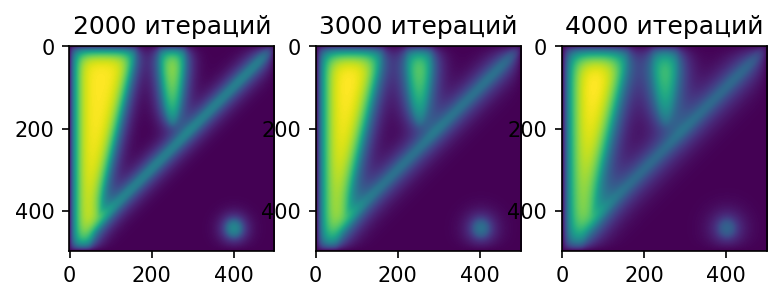

In [565]:
fig = plt.figure()
for i in i_list:
    ax = fig.add_subplot(1,3,i)
    plt.imshow(u[n_list[i+5]] )
    plt.title(f'{n_list[i+5]} итераций')
plt.show()